In [10]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import time


start_time = time.time()
# --------------------准备数据集------------------
# Dataset, DataLoader
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), std =(0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='C:/Users/wangkewang/Desktop/AI中阶/pytorch测试/CIFAR10', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='C:/Users/wangkewang/Desktop/AI中阶/pytorch测试/CIFAR10',train=False,
                                       transform=transform, download=True)

trainloader = DataLoader(dataset=trainset, batch_size=4, shuffle=True)
testloader = DataLoader(dataset=testset, batch_size=4, shuffle=True)


images,labels=next(iter(trainloader))

#定义一个简单的网络
# LeNet -5
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=16 * 5 * 5,out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool1(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)              # reshape tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 定义损失函数，优化方法
# 采用Cross-Entropy loss,  SGD with moment
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# 训练网络
# 迭代epoch
for epoch in range(20):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the input
        inputs, labels = data

        # zeros the paramster gradients
        optimizer.zero_grad()       # 

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)  # 计算loss
        loss.backward()     # loss 求导
        optimizer.step()    # 更新参数

        # print statistics
        running_loss += loss.item()  # tensor.item()  获取tensor的数值
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))  # 每2000次迭代，输出loss的平均值
            running_loss = 0.0

print('Finished Training')
stop_time = time.time()
print("time is %s" %(stop_time-start_time))

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.256
[1,  4000] loss: 1.880
[1,  6000] loss: 1.677
[1,  8000] loss: 1.567
[1, 10000] loss: 1.499
[1, 12000] loss: 1.415
[2,  2000] loss: 1.379
[2,  4000] loss: 1.356
[2,  6000] loss: 1.339
[2,  8000] loss: 1.290
[2, 10000] loss: 1.283
[2, 12000] loss: 1.250
[3,  2000] loss: 1.172
[3,  4000] loss: 1.184
[3,  6000] loss: 1.187
[3,  8000] loss: 1.168
[3, 10000] loss: 1.155
[3, 12000] loss: 1.179
[4,  2000] loss: 1.074
[4,  4000] loss: 1.095
[4,  6000] loss: 1.109
[4,  8000] loss: 1.084
[4, 10000] loss: 1.108
[4, 12000] loss: 1.075
[5,  2000] loss: 0.990
[5,  4000] loss: 1.003
[5,  6000] loss: 1.036
[5,  8000] loss: 1.057
[5, 10000] loss: 1.040
[5, 12000] loss: 1.020
[6,  2000] loss: 0.911
[6,  4000] loss: 0.966
[6,  6000] loss: 0.991
[6,  8000] loss: 0.986
[6, 10000] loss: 0.981
[6, 12000] loss: 0.973
[7,  2000] loss: 0.908
[7,  4000] loss: 0.912
[7,  6000] loss: 0.931
[7,  8000] loss: 0.913
[7, 

In [3]:
# --------保存模型-----------
torch.save(net, 'C:/Users/wangkewang/Desktop/AI中阶/pytorch测试/CIFAR10/model_cfair10_2.pth')    # 保存整个模型，体积比较大
# torch.save(net.state_dict(), './model/model_cfair10.pth')



torch.Size([3, 32, 32])


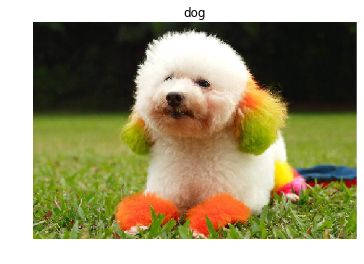

In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


CFAIR10_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'forg', 'horse', 'ship', 'truck']
# load a image
image = Image.open('C:/Users/wangkewang/Desktop/AI中阶/pytorch测试/CIFAR10/dog.jpg')

transform = transforms.Compose(
    [transforms.Resize((32, 32)),
     transforms.ToTensor(),
     transforms.Normalize(
         mean=(0.5, 0.5, 0.5),
         std=(0.5, 0.5, 0.5)
     )])

image_transformed = transform(image)
print(image_transformed.size())


net = torch.load('C:/Users/wangkewang/Desktop/AI中阶/pytorch测试/CIFAR10/model_cfair10_2.pth')
# print(net)

image_transformed = image_transformed.unsqueeze(0)
output = net(image_transformed)
predict_value, predict_idx = torch.max(output, 1)  # 求指定维度的最大值，返回最大值以及索引

plt.figure()
plt.imshow(np.array(image))
plt.title(CFAIR10_names[predict_idx])
plt.axis('off')

plt.show()

In [12]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import time


start_time = time.time()
# --------------------准备数据集------------------
is_support = torch.cuda.is_available()
if is_support:
  device = torch.device('cuda:0')
 # device = torch.device('cuda:1')
else:
  device = torch.device('cpu')

# Dataset, DataLoader
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), std =(0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='C:/Users/wangkewang/Desktop/AI中阶/pytorch测试/CIFAR10', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='C:/Users/wangkewang/Desktop/AI中阶/pytorch测试/CIFAR10',train=False,
                                       transform=transform, download=True)

trainloader = DataLoader(dataset=trainset, batch_size=4, shuffle=True)
testloader = DataLoader(dataset=testset, batch_size=4, shuffle=True)


images,labels=next(iter(trainloader))

#定义一个简单的网络
# LeNet -5
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=16 * 5 * 5,out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool1(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)              # reshape tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 定义损失函数，优化方法
# 采用Cross-Entropy loss,  SGD with moment
net = Net()
net.to(device)   # GPU模式需要添加


# 训练网络
# 迭代epoch
for epoch in range(20):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the input
        inputs, labels = data

        inputs = inputs.to(device)      #  GPU计算
        labels = labels.to(device)      # GPU计算

        # zeros the paramster gradients
        optimizer.zero_grad()       # 

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)  # 计算loss
        loss.backward()     # loss 求导
        optimizer.step()    # 更新参数

        # print statistics
        running_loss += loss.item()  # tensor.item()  获取tensor的数值
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))  # 每2000次迭代，输出loss的平均值
            running_loss = 0.0

print('Finished Training')

stop_time = time.time()
print("time is %s" %(stop_time-start_time))

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.304
[1,  4000] loss: 2.304
[1,  6000] loss: 2.304
[1,  8000] loss: 2.304
[1, 10000] loss: 2.304
[1, 12000] loss: 2.303
[2,  2000] loss: 2.304
[2,  4000] loss: 2.303
[2,  6000] loss: 2.304
[2,  8000] loss: 2.304
[2, 10000] loss: 2.305
[2, 12000] loss: 2.303
[3,  2000] loss: 2.305
[3,  4000] loss: 2.303
[3,  6000] loss: 2.304
[3,  8000] loss: 2.303
[3, 10000] loss: 2.305
[3, 12000] loss: 2.303
[4,  2000] loss: 2.303
[4,  4000] loss: 2.303
[4,  6000] loss: 2.305
[4,  8000] loss: 2.303
[4, 10000] loss: 2.304
[4, 12000] loss: 2.304
[5,  2000] loss: 2.304
[5,  4000] loss: 2.303
[5,  6000] loss: 2.304
[5,  8000] loss: 2.304
[5, 10000] loss: 2.303
[5, 12000] loss: 2.304
[6,  2000] loss: 2.303
[6,  4000] loss: 2.304
[6,  6000] loss: 2.304
[6,  8000] loss: 2.303
[6, 10000] loss: 2.304
[6, 12000] loss: 2.304
[7,  2000] loss: 2.304
[7,  4000] loss: 2.304
[7,  6000] loss: 2.303
[7,  8000] loss: 2.304
[7, 